<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


<h3>Importing Data</h3>

In [2]:
df = pd.read_csv("../input/practical2-dataset/practical-1/Dataset.csv")

<h3>Analysing Data</h3>

In [3]:
df.head()

,Country,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
0,Somalia,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,Somalia,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,Nigeria,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,Sudan,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,Nigeria,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          3276 non-null   object 
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Drinkable        3276 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 281.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Drinkable,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<h3>Handling Missing Values</h3>

In [7]:
df.isna().sum()

Country              0
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Drinkable            0
dtype: int64

<AxesSubplot:>

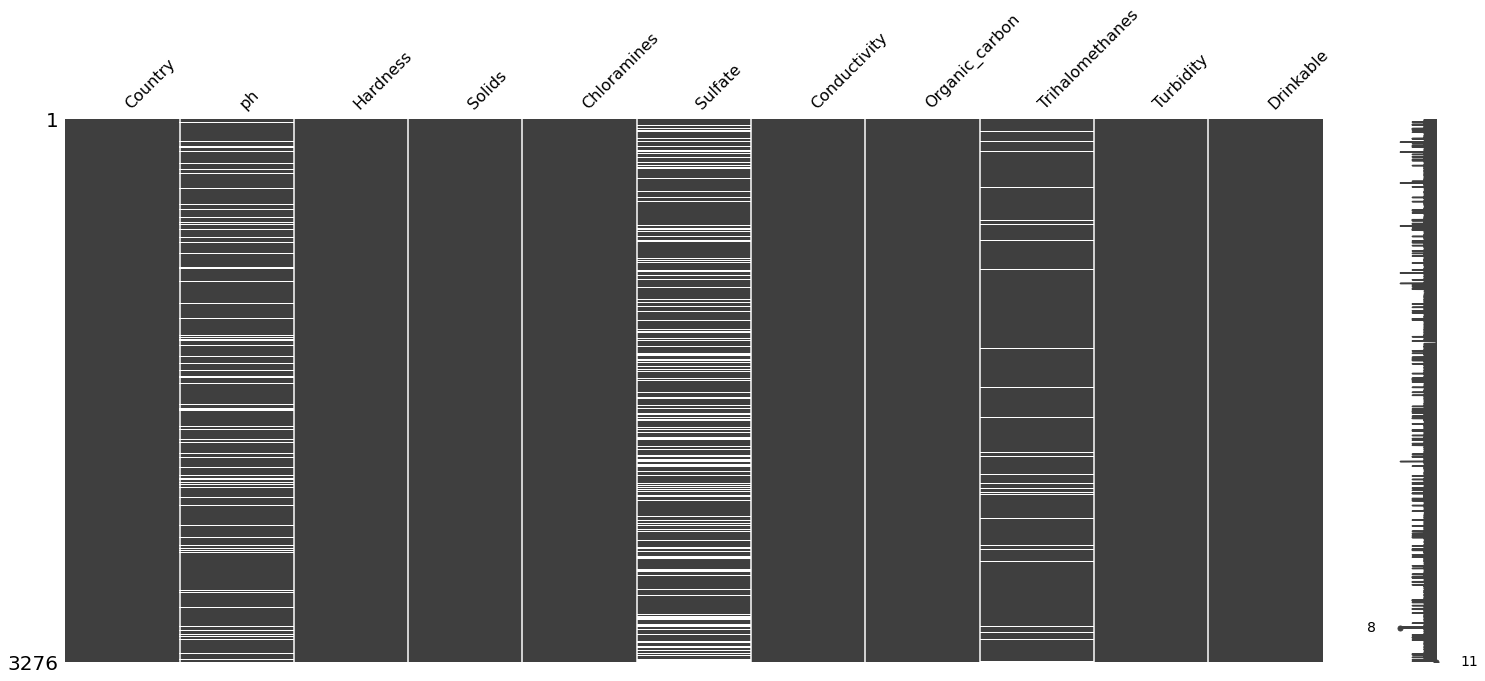

In [8]:
msno.matrix(df)

Imputing Missing Values

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df.ph = imputer.fit_transform(df.ph.values.reshape(-1, 1))
df.Sulfate = imputer.fit_transform(df.Sulfate.values.reshape(-1, 1))
df.Trihalomethanes = imputer.fit_transform(df.Trihalomethanes.values.reshape(-1, 1))

In [10]:
df.head()

,Country,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
0,Somalia,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,Somalia,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,Nigeria,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,Sudan,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,Nigeria,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          3276 non-null   object 
 1   ph               3276 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          3276 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3276 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Drinkable        3276 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 281.7+ KB


<h3>Encoding Of Categorical Features</h3>

In [12]:
df_cat = pd.get_dummies(df.Country)
df_cat.head()

df_nor = df.drop(['Country'], axis = 1)

df = pd.concat([df_cat, df_nor], axis = 1)
df.head()

,Nigeria,Somalia,Sudan,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
0,0,1,0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,0,1,0,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,1,0,0,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,0,0,1,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,1,0,0,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<h3>Data Visualization</h3>

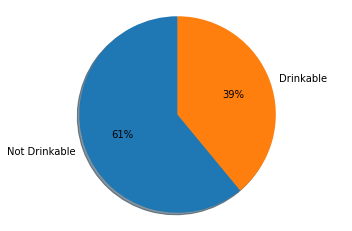

In [13]:
labels = ['Not Drinkable','Drinkable']
values = [df[df["Drinkable"]==0].shape[0], df[df["Drinkable"]==1].shape[0]]

fig, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Visualizing the linear correlations between variables using Heatmap Visualization.

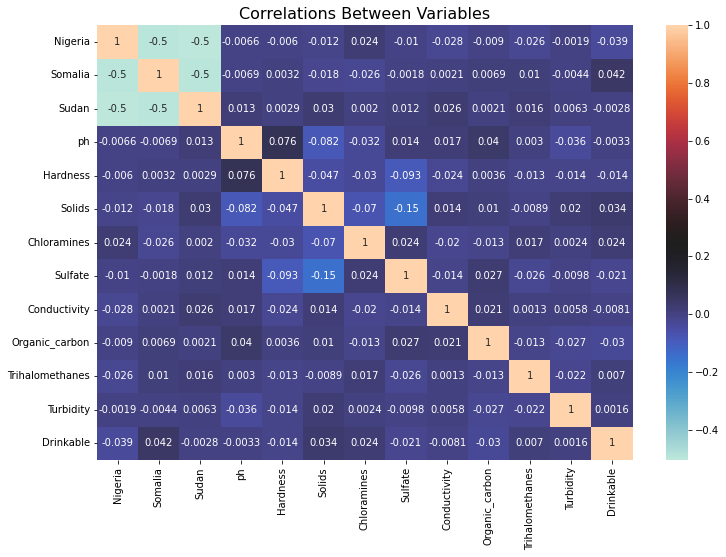

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="icefire")
plt.title("Correlations Between Variables", size=16)
plt.show()

<h3>Distribute Data into labels and features</h3>

In [15]:
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:,-1])

<h3>Splitting Dataset into Training Set and Test Set</h3>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h3>Feature Scaling (Normalization)</h3>

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-0.69781563, -0.70872673,  1.39896769, ...,  0.1880379 ,
        -1.25125089, -1.51463513],
       [ 1.43304328, -0.70872673, -0.71481279, ..., -1.18739347,
        -1.34485656, -0.7843761 ],
       [-0.69781563, -0.70872673,  1.39896769, ...,  1.21207458,
        -1.51137132, -0.59739159],
       ...,
       [-0.69781563,  1.41098107, -0.71481279, ...,  0.34047695,
        -0.63301136, -0.18534202],
       [ 1.43304328, -0.70872673, -0.71481279, ...,  1.24828798,
        -0.35018463,  1.37466739],
       [ 1.43304328, -0.70872673, -0.71481279, ...,  0.27148617,
         0.57423597,  0.21638536]])